In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import pandas as pd
import glob
import shutil
import subprocess
import re
from matplotlib.ticker import MultipleLocator
import matplotlib

In [18]:


# Function to recursively search for files within subdirectories
def search_files(directory):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_list.append(os.path.join(root, file))
    return file_list

In [5]:
# Directory where the files are located
#file_directory = "/home/gabriel/Projects/Figures/Results/Density"
file_directory = "/home/gabriel/Projects/Anchoring_Study/anch_frac_0.5/Results/lc_length_6/Density"

# Executable command to run
executable_command = "/home/gabriel/MATILDA.FT/utils/post-proc/calc-sk/calc-sk-per-frame"

# Get a list of all files in the directory
files =  search_files(file_directory)
# Iterate over the files
for file_path in files:
    filename = os.path.basename(file_path)
    # Check if the file matches the desired name structure
    pattern = re.compile(r"phase_separation_(nematic|smectic|isotropic)_lc_frac_(0\.3|0\.5|0\.7)_anch_str_(0.0|5.0|-5.0)_Nb_6_rep_(0|1|2)_Nb_6_den.bin$")
    if pattern.match(filename): 

        # Extract the necessary parts from the filename
        particle_type = re.findall(r'(nematic|smectic|isotropic)', filename)[0]
        lc_frac = re.findall(r'frac_(0\.\d+)', filename)[0]
        matches = re.findall(r'anch_str_(-?\d+\.\d+)', filename)
        anch_str = float(matches[0]) if matches else 0.0
        rep = re.findall(r'rep_(\d)', filename)[0]

        # Create the folder name
        folder_name = f"{particle_type}_lc_frac_{lc_frac}_anch_str_{anch_str}"
        folder_path = os.path.join(file_directory, folder_name)

        # Create the folder if it doesn't exist
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)


        # Move the file into the folder
        #new_file_path = os.path.join(folder_path, filename)
        #shutil.move(file_path, new_file_path)

        # Set the working directory to the folder
        os.chdir(folder_path)
        # Run the executable command
        command = f"{executable_command} {filename}"
        os.system(command)

Dim = 3
Nx[0]: 60 Nx[1]: 60 Nx[2]: 60
ntypes: 3
fft initialized!
M: 216000 ML: 216000
Successfully read 35 frames
Dim = 3
Nx[0]: 60 Nx[1]: 60 Nx[2]: 60
ntypes: 3
fft initialized!
M: 216000 ML: 216000
Successfully read 35 frames
Dim = 3
Nx[0]: 60 Nx[1]: 60 Nx[2]: 60
ntypes: 3
fft initialized!
M: 216000 ML: 216000
Successfully read 35 frames
Dim = 3
Nx[0]: 60 Nx[1]: 60 Nx[2]: 60
ntypes: 3
fft initialized!
M: 216000 ML: 216000
Successfully read 35 frames
Dim = 3
Nx[0]: 60 Nx[1]: 60 Nx[2]: 60
ntypes: 3
fft initialized!
M: 216000 ML: 216000
Successfully read 35 frames
Dim = 3
Nx[0]: 60 Nx[1]: 60 Nx[2]: 60
ntypes: 3
fft initialized!
M: 216000 ML: 216000
Successfully read 35 frames
Dim = 3
Nx[0]: 60 Nx[1]: 60 Nx[2]: 60
ntypes: 3
fft initialized!
M: 216000 ML: 216000
Successfully read 35 frames
Dim = 3
Nx[0]: 60 Nx[1]: 60 Nx[2]: 60
ntypes: 3
fft initialized!
M: 216000 ML: 216000
Successfully read 35 frames
Dim = 3
Nx[0]: 60 Nx[1]: 60 Nx[2]: 60
ntypes: 3
fft initialized!
M: 216000 ML: 216000
Su

In [19]:
# Logarithmic timesteps
max_steps = 2000001
n_frames  = 35
freq = 1000
steps = []
mult_factor = (max_steps/freq)**(1/(n_frames))
for i in range(n_frames):
    freq = freq*mult_factor
    steps.append(int(freq))

print(steps)

[1242, 1543, 1918, 2383, 2961, 3680, 4573, 5682, 7060, 8773, 10901, 13545, 16830, 20912, 25985, 32288, 40119, 49850, 61942, 76966, 95635, 118831, 147655, 183469, 227970, 283265, 351972, 437345, 543424, 675234, 839014, 1042520, 1295388, 1609589, 2000000]


In [ ]:
file_directory = "/home/gabriel/Projects/Anchoring_Study/anch_frac_0.5/Results/lc_length_6/Density"
# Find new files
new_files = search_files(file_directory)

#Empty list for storing dataframes
df_list = []
for filepath in new_files:
    filename = os.path.basename(filepath)
    pattern = re.compile(r"phase_separation_smectic_lc_frac_(0\.3|0\.5|0\.7)_anch_str_0\.0_Nb_6_rep_[0-2]_Nb_6_den_type_0_frame_([1-9]|[1-2][0-9]|3[0-4]).sk")
    if pattern.match(filename):        # Parse the lc type, lc fraction, anchoring strength, particle type, and frame from the filename


        # Read data from file
        file_data = pd.read_csv(filepath, usecols=[3 , 4], delim_whitespace=True, header=None, names=["structure_factor", "k"], index_col= False, dtype={"structure_factor": np.float16, "k": np.float16})
        file_data["lc_type"] = re.findall(r'(nematic|smectic|isotropic)', filename)[0]
        file_data["lc_fraction"] = re.findall(r'frac_(0\.\d+)', filename)[0]
        matches = re.findall(r'anch_str_(-?\d+\.\d+)', filename)
        file_data["anchoring_strength"] = float(matches[0]) if matches else 0.0
        file_data["rep"] = re.findall(r'rep_(\d)', filename)[0]
        frame = int(re.findall(r'frame_(\d+)', filename)[0])
        file_data["frame"] = frame
        file_data["step"] = steps[np.int8(frame)]

        # Append file_data to all_data DataFrame
        # Add this DataFrame to the list
        df_list.append(file_data)

# Concatenate all the DataFrames in the list into a single DataFrame
data = pd.concat(df_list, ignore_index=True)

# Delete temporary data to free memory
del df_list



: 

In [10]:
# check to see if isotropic data in pandas dataframe

isotropic_data = data[data['lc_type'] == 'isotropic']
if isotropic_data.empty:
    print("No data with lc_type = 'isotropic' found.")
else:
    print("Data with lc_type = 'isotropic' found.")

# check to see what lc_types in dataframe
lc_types = data['lc_type'].unique()
print("lc_types in dataframe: ", lc_types)


Data with lc_type = 'isotropic' found.
lc_types in dataframe:  ['nematic' 'smectic' 'isotropic']


In [13]:
from scipy.optimize import curve_fit
def lorentzian( x, center, area, width, bg ):
    return area / ( 1.0 + (( x - center )/width)**2) + bg

# Results list (use list instead of DataFrame for appending)
result_rows = []
#  Group data by lc_type, lc_frac, anchoring_strength, and rep
grouped_data = data.groupby(["lc_type", "lc_fraction", "anchoring_strength","rep"])

x_q = np.arange(0, 1, 0.0001)
min_k = 2*math.pi/60.0
index = 0


# Iterate over groups and perform Lorentzian fit
for (lc_type, lc_frac, anch, rep), group_data in grouped_data:
    group_data = group_data.loc[group_data["step"] > 1000]
    min_k_flag = False
    for timestep, frame_data in group_data.groupby("step"):
        xdata = frame_data.loc[frame_data["k"] < 1.0, "k"].values
        ydata = frame_data.loc[frame_data["k"] < 1.0, "structure_factor"].values

        # Initial parameter estimates for the fit
        initial_params = [xdata[np.argmax(ydata)], np.max(ydata), 0.1, 0]
        if min_k_flag:
            k_star = min_k
        else:
            # Perform the Lorentzian fit using curve_fit
            try:
                params, _ = curve_fit(lorentzian, xdata, ydata, p0=initial_params)
                lorentz_fit_value = lorentzian(x_q, *params)
                k_star = x_q[lorentz_fit_value.argmax()]

            except RuntimeError:
                # Handle cases where the fit fails
                #print(f"Fit failed for {group_name}, timestep: {timestep}")
                k_star = frame_data.iloc[frame_data["structure_factor"].argmax()]["k"]
            if k_star <= min_k:
                k_star = min_k
                min_k_flag = True
        # Append data to the result list
        result_rows.append([lc_type, lc_frac, anch, timestep, rep, k_star])
# Convert result list to DataFrame
result_data = pd.DataFrame(result_rows, columns=["lc_type", "lc_fraction", "anchoring_strength", "timestep", "rep", "k_star"])

# Delete temporary data to free memory
del result_rows
del grouped_data

# Group all relevant columns (excluding k_star and rep) and calculate the mean and std deviation of k_star across all reps.
aggregated_data = result_data.groupby([ "lc_type", "lc_fraction", "anchoring_strength", "timestep"]).agg(
    k_star_mean=('k_star', 'mean'),
    k_star_std=('k_star', 'std')
).reset_index()



In [14]:
output_dir = "/home/gabriel/Projects/Anchoring_Study/anch_frac_0.5/Results/lc_length_6/Density"
# Save the aggregated data to a CSV file
grouped_results = aggregated_data.groupby(["lc_type", "lc_fraction", "anchoring_strength", "timestep"])
# Given parameters
max_steps = 2000001
n_frames  = 35
freq = 1000

# Compute the multiplicative factor
mult_factor = (max_steps / freq) ** (1 / n_frames)

def get_frame_from_step(step):
    """ Returns the frame number given a simulation step. """
    frame = np.log(step / 1000) / np.log(mult_factor)  # Solve for frame index
    frame = int(round(frame))  # Round to the nearest integer frame
    
    # Ensure the frame is within valid bounds
    if frame < 0:
        frame = 0
    elif frame >= n_frames:
        frame = n_frames - 1
    
    return frame


for (lc_type, lc_frac, anchoring_strength, timestep), group in grouped_results:
    frame_number = get_frame_from_step(timestep)
    group["frame"] = frame_number
    output_file = os.path.join(output_dir, f"lc_type_{lc_type}_lc_frac_{lc_frac}_anchoring_strength_{anchoring_strength}_k_star.csv")
    group.to_csv(output_file, index=False)
    print(f"Saved results to {output_file}")
    

Saved results to /home/gabriel/Projects/Anchoring_Study/anch_frac_0.5/Results/lc_length_6/Density/lc_type_nematic_lc_frac_0.5_anchoring_strength_-5.0_k_star.csv
Saved results to /home/gabriel/Projects/Anchoring_Study/anch_frac_0.5/Results/lc_length_6/Density/lc_type_nematic_lc_frac_0.5_anchoring_strength_-5.0_k_star.csv
Saved results to /home/gabriel/Projects/Anchoring_Study/anch_frac_0.5/Results/lc_length_6/Density/lc_type_nematic_lc_frac_0.5_anchoring_strength_-5.0_k_star.csv
Saved results to /home/gabriel/Projects/Anchoring_Study/anch_frac_0.5/Results/lc_length_6/Density/lc_type_nematic_lc_frac_0.5_anchoring_strength_-5.0_k_star.csv
Saved results to /home/gabriel/Projects/Anchoring_Study/anch_frac_0.5/Results/lc_length_6/Density/lc_type_nematic_lc_frac_0.5_anchoring_strength_-5.0_k_star.csv
Saved results to /home/gabriel/Projects/Anchoring_Study/anch_frac_0.5/Results/lc_length_6/Density/lc_type_nematic_lc_frac_0.5_anchoring_strength_-5.0_k_star.csv
Saved results to /home/gabriel/Pro

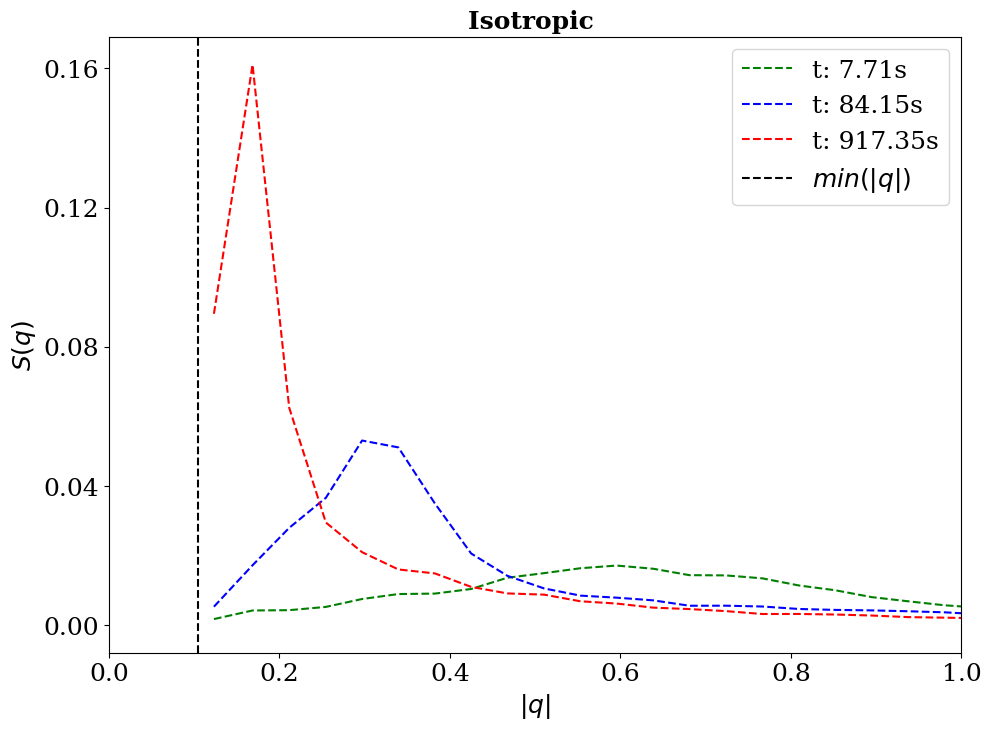

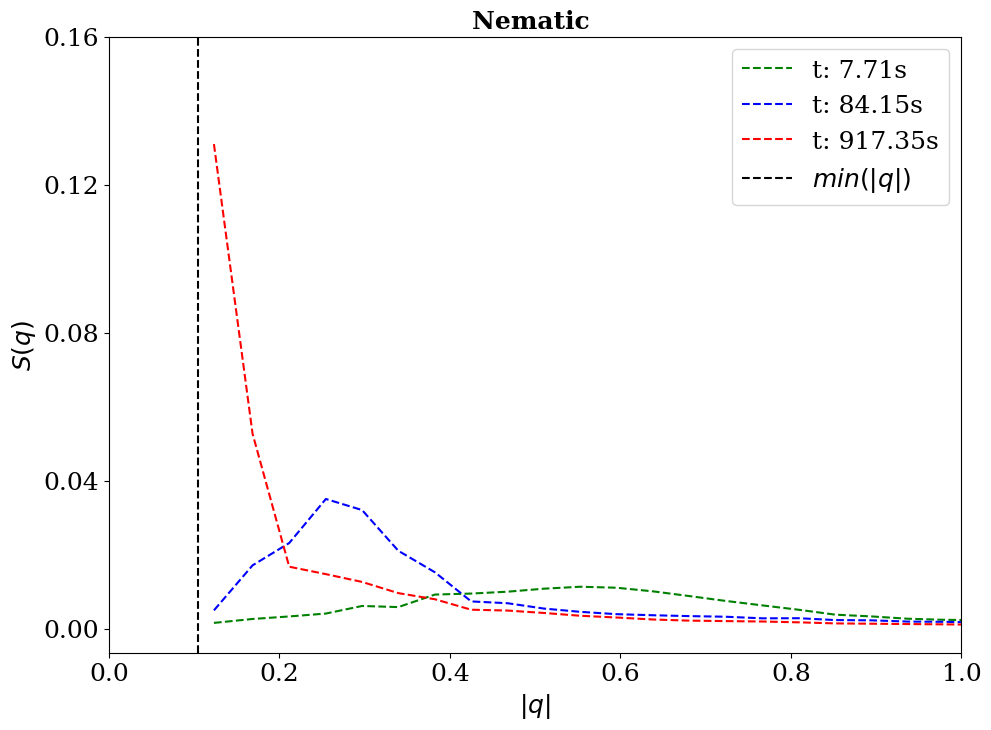

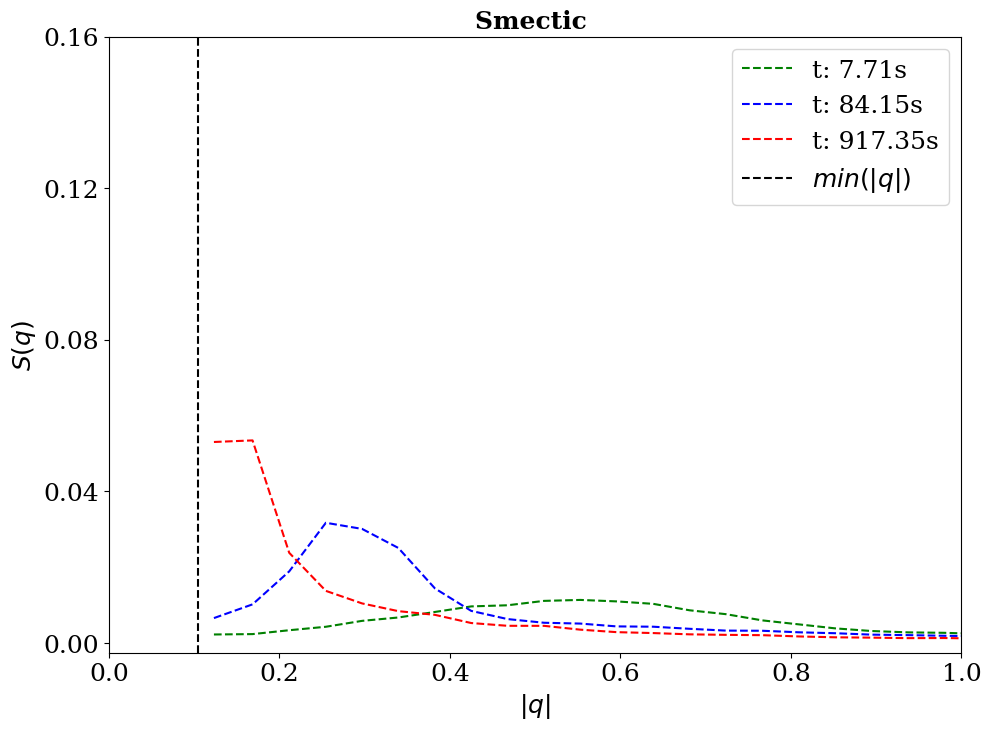

In [34]:

# Filter data for nematic and smectic systems and specifically for frames 5, 10, 15, and 20
#frames_of_interest = [26, 30, 34]
frames_of_interest = [23, 27, 31]
#filtered_data = data[(data['lc_type'].isin(['nematic'])) & (data['frame'].isin(frames_of_interest))]
filtered_data = data[(data['frame'].isin(frames_of_interest))]

# Group by lc_type, lc_fraction, anchoring_strength, but not by frame anymore
grouped_data = filtered_data.groupby(["lc_type", "lc_fraction", "anchoring_strength"])

colors = ["red", "blue", "green","red", "blue", "green","red", "blue", "green"]  # Color iterator for distinct frame plots

matplotlib.rc('font', family='serif')

# Iterate over groups without iterating over frame
for group_name, group_data in grouped_data:
    # Initialize the previous_max_y variable
    previous_max_y = 0

    plt.figure(figsize=(11, 8))  # Initialize the plot outside the loop
    lc_type, lc_frac, anchoring_strength = group_name
    
    for frame in frames_of_interest:
        frame_data = group_data[group_data['frame'] == frame]
        
        # Ensure 'k' and 'structure_factor' are numeric
        frame_data = frame_data[['k', 'structure_factor']].dropna().astype(float)
        
        # Bin 'k' values and calculate mean structure factor for each bin
        frame_data['bq'] = pd.cut(frame_data['k'], bins=125)
        binned_data = frame_data.groupby('bq').mean()
        
        # Calculate midpoint of bins for plotting
        binned_data['bq_mid'] = [interval.mid for interval in binned_data.index]
        
        # Offset the y values by the previous_max_y
        #binned_data['structure_factor'] += previous_max_y
        
        # Update previous_max_y with the maximum y value of the current timestep
        previous_max_y = binned_data['structure_factor'].max()
        
        # Plotting
        plt.plot(binned_data['bq_mid'], binned_data['structure_factor'], '--', color=colors.pop(), markersize=8, label=f't: {steps[int(frame)]*0.005:.2f}')
    
    # After plotting all frames for a group, adjust plot settings
    plt.xlabel(r"$|q|$", fontsize=18)
    plt.ylabel(r"$S(q)$", fontsize=18)
    #write title in bold
    
    plt.title(f"{lc_type.capitalize()} ", fontsize=18, weight='bold')
    plt.xlim(0, 1)
    #add minimum q vertical line
    plt.axvline(x=2*math.pi/60.0, color='black', linestyle='--', label='$min(|q|)$')
    #Add vertical liine to legend
    
    #plt.yscale("log")
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    #plt.title(f"{lc_type.capitalize()} System, lc_fraction={lc_frac}, anchoring_strength={anchoring_strength}")
    plt.legend(fontsize=18)
    ax = plt.gca()  # Get the current Axes instance on the current figure
    # start x axis tics at 0.1
    #ax.xaxis.set_major_locator(MultipleLocator(0.2, 0.1))
    ax.set_xticks(np.arange(0.0, 1.1, 0.2))  # Set x-axis tick locations starting from 0.1
    ax.set_yticks(np.arange(0, .161, .04))  # Set x-axis tick locations starting from 0.1

    plt.show()

    # Save plot
    dir_name = f"{lc_type}_lc_frac_{lc_frac}_anch_str_{anchoring_strength}"
    save_loc = os.path.join(file_directory, dir_name)
    if not os.path.exists(save_loc):
        os.makedirs(save_loc)
    file_name = f"{dir_name}.png"
    file_loc = os.path.join(save_loc, file_name)
    plt.savefig(file_loc, dpi=500)
    plt.close()



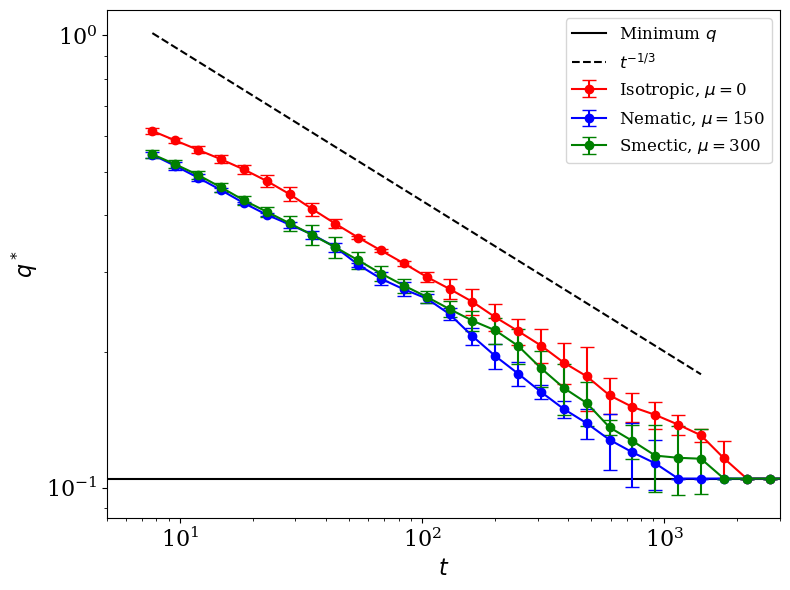

In [13]:
import matplotlib.pyplot as plt
import math
matplotlib.rc('font', family='serif')
# Assuming 'aggregated_data' is your DataFrame with the results
min_k = 2 * math.pi / 60.0


# Improved color assignment
color_map = {"isotropic": "red", "nematic": "blue", "smectic": "green"}

# Initialize the figure more appropriately
fig, ax = plt.subplots(figsize=(8, 6))

# Set the title and labels with improved readability
ax.axhline(min_k, color="black", label="Minimum $q$")
ax.set_xscale("log")  # Consider if log scale is necessary for your data
ax.set_yscale("log")
ax.set_xlabel("$t$", fontsize=16)
ax.set_ylabel("$q^*$", fontsize=16)
ax.set_xlim(5, 3000)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)


# Group and plot data
grouped_results = aggregated_data.groupby(["lc_type", "lc_fraction", "anchoring_strength"])

for (lc_type, lc_frac, anchoring_strength ), group in grouped_results:
    color = color_map.get(lc_type, "gray")  # Fallback color is gray
    # Make dict where key is lc_type and value is MS potential
    MS_pot = {"isotropic": 0, "nematic": 150, "smectic": 300}
    label = rf"{lc_type.capitalize()}, $\mu=${MS_pot[lc_type]}"
    ax.errorbar(group["timestep"]*.005, group["k_star_mean"], yerr=group["k_star_std"], label=label, color=color, fmt='o-', capsize=5)

#Add a short -1/3rd power law line for reference

timesteps = aggregated_data["timestep"].unique()
timesteps = timesteps[timesteps < 300000]
ax.plot(timesteps*.005, 2 * (timesteps*.005)**(-1/3), label=r"$t^{-1/3}$", color="black", linestyle="--")

# Improve legend readability
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

